Credit Card Dataset for Fraud Detection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('creditcard_for_fraud_detection.csv')

In [ ]:
print(data.head())
print(data.describe())
print(data.info())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [ ]:
data = data.dropna()

In [ ]:
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
X = data.drop(columns=['Class'])
y = data['Class']

In [ ]:
iso_forest = IsolationForest(contamination=0.00172, random_state=42)
data['anomaly'] = iso_forest.fit_predict(X)

In [ ]:
data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})

In [ ]:
anomalies = data[data['anomaly'] == 1]
print(f'Number of anomalies detected: {len(anomalies)}')

Number of anomalies detected: 110


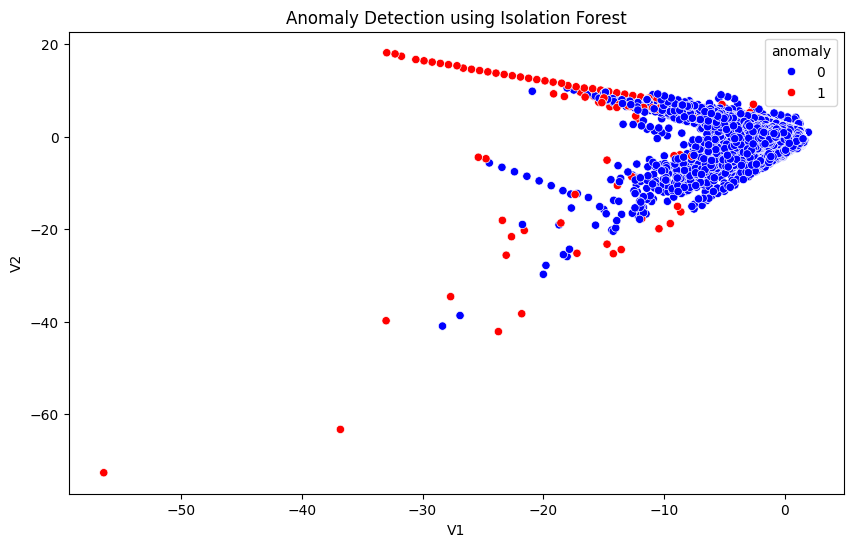

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='V1', y='V2', hue='anomaly', data=data, palette=['blue', 'red'])
plt.title('Anomaly Detection using Isolation Forest')
plt.show()

In [ ]:
anomaly_features = anomalies.describe()
print(anomaly_features)

               Time          V1          V2          V3          V4  \
count    110.000000  110.000000  110.000000  110.000000  110.000000   
mean   32448.336364  -15.975069    0.715401  -14.811310    6.506344   
std    11011.017324    8.812958   16.551671    8.196288    3.093459   
min     1264.000000  -56.407510  -72.715728  -32.965346   -2.686814   
25%    24582.750000  -21.727354   -4.180172  -20.321756    5.896342   
50%    31444.000000  -14.524924    6.538900  -13.483284    6.276325   
75%    41343.000000   -9.186191    9.769228   -8.471688    7.927614   
max    50257.000000   -2.140511   18.183626    2.243079   16.715537   

               V5          V6          V7          V8          V9  ...  \
count  110.000000  110.000000  110.000000  110.000000  110.000000  ...   
mean   -10.381703   -1.475250   -8.085665    4.457973   -3.115256  ...   
std     10.322969    6.634295   13.159476    8.971620    3.516056  ...   
min    -42.147898  -26.160506  -26.548144  -22.588547   -9.28392

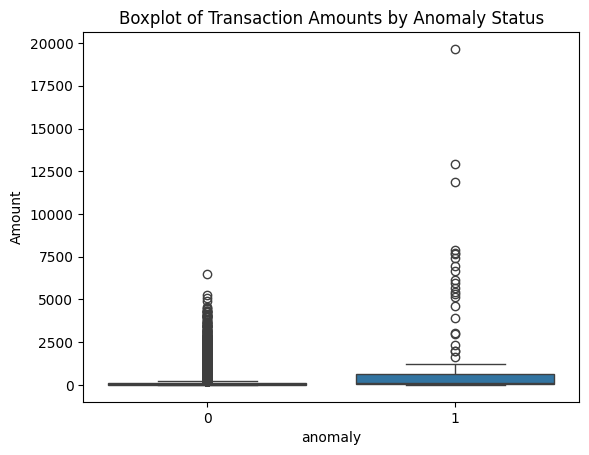

In [ ]:
sns.boxplot(x='anomaly', y='Amount', data=data)
plt.title('Boxplot of Transaction Amounts by Anomaly Status')
plt.show()

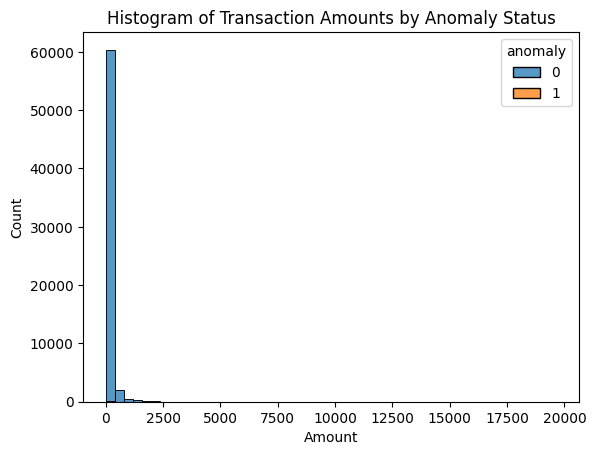

In [ ]:
sns.histplot(data=data, x='Amount', hue='anomaly', multiple='stack', bins=50)
plt.title('Histogram of Transaction Amounts by Anomaly Status')
plt.show()

Customer Profiling

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [7]:
data = pd.read_csv('Credit_Card_Customer_Data.csv')

In [8]:
print(data.head())

   Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3  


In [9]:
data = data.fillna(data.mean())

In [10]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [12]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [18]:

def initialize_centroids(data, k):
    centroids = data.sample(n=k).values
    return centroids

def assign_clusters(data, centroids):

    data_array = data.values
    distances = np.linalg.norm(data_array[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, labels, k):
    centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return centroids

def kmeans(data, k, max_iter=100):
    centroids = initialize_centroids(data, k)
    for i in range(max_iter):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

def calculate_inertia(data, labels, centroids):
    inertia = 0
    for i, centroid in enumerate(centroids):
        inertia += np.sum((data[labels == i] - centroid)**2)
    return inertia


inertia = []
K = range(1, 11)
for k in K:
    labels, centroids = kmeans(data_scaled, k)

    inertia.append(calculate_inertia(data_scaled.values, labels, centroids))

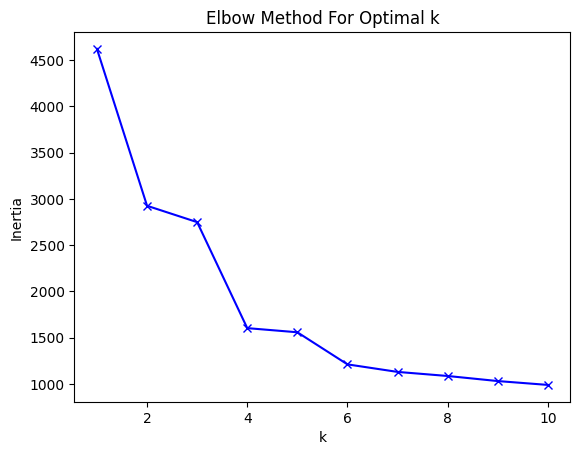

In [17]:
import matplotlib.pyplot as plt
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [20]:
X = data_scaled.drop('Avg_Credit_Limit', axis=1)
y = data_scaled['Avg_Credit_Limit']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.242419404903766


In [24]:
coefficients = model.coef_
features = X.columns
importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
importance = importance.sort_values(by='Coefficient', ascending=False)
print(importance)

               Feature  Coefficient
0                Sl_No     0.635637
4  Total_visits_online     0.436778
2   Total_Credit_Cards     0.097639
1         Customer Key     0.035818
5     Total_calls_made    -0.080491
3    Total_visits_bank    -0.192414
